In [61]:
from sklearn.datasets import load_boston
boston = load_boston()

C:\Users\anike\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the

In [62]:
data = pd.DataFrame(boston.data)

In [63]:
data.columns = boston.feature_names

array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

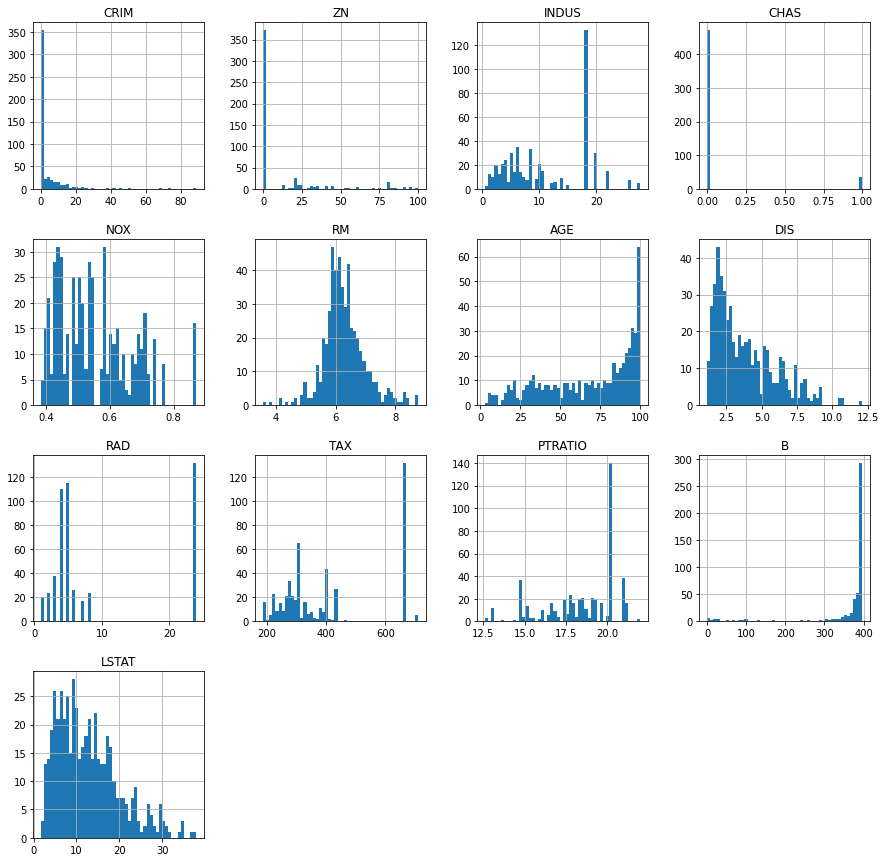

In [64]:
data.hist(bins=50, figsize=(15,15))

In [65]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [66]:
data['PRICE'] = boston.target

In [67]:
X = data.drop(['PRICE'], axis = 1)
y = data['PRICE']

In [68]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)


In [69]:
print(X[:5])


[[-0.41978194  0.28482986 -1.2879095  -0.27259857 -0.14421743  0.41367189
  -0.12001342  0.1402136  -0.98284286 -0.66660821 -1.45900038  0.44105193
  -1.0755623 ]
 [-0.41733926 -0.48772236 -0.59338101 -0.27259857 -0.74026221  0.19427445
   0.36716642  0.55715988 -0.8678825  -0.98732948 -0.30309415  0.44105193
  -0.49243937]
 [-0.41734159 -0.48772236 -0.59338101 -0.27259857 -0.74026221  1.28271368
  -0.26581176  0.55715988 -0.8678825  -0.98732948 -0.30309415  0.39642699
  -1.2087274 ]
 [-0.41675042 -0.48772236 -1.30687771 -0.27259857 -0.83528384  1.01630251
  -0.80988851  1.07773662 -0.75292215 -1.10611514  0.1130321   0.41616284
  -1.36151682]
 [-0.41248185 -0.48772236 -1.30687771 -0.27259857 -0.83528384  1.22857665
  -0.51117971  1.07773662 -0.75292215 -1.10611514  0.1130321   0.44105193
  -1.02650148]]


In [70]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Print the shapes of the training and testing sets
print('Training set shape:', X_train.shape, y_train.shape)
print('Testing set shape:', X_test.shape, y_test.shape)

Training set shape: (354, 13) (354,)
Testing set shape: (152, 13) (152,)


In [71]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
# Define the model architecture
model =Sequential()
model.add(Dense(64, input_dim=13, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))
# Display the model summary
print(model.summary())


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                896       
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3,009
Trainable params: 3,009
Non-trainable params: 0
_________________________________________________________________
None


In [72]:
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mean_absolute_error'])


In [73]:
from keras.callbacks import EarlyStopping
# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32,
callbacks=[early_stopping])

Epoch 1/100
9/9 [==============================] - 1s 22ms/step - loss: 624.0375 - mean_absolute_error: 23.0327 - val_loss: 566.0089 - val_mean_absolute_error: 22.3130
Epoch 2/100
9/9 [==============================] - 0s 6ms/step - loss: 590.5035 - mean_absolute_error: 22.3621 - val_loss: 535.8998 - val_mean_absolute_error: 21.6729
Epoch 3/100
9/9 [==============================] - 0s 6ms/step - loss: 561.0443 - mean_absolute_error: 21.7350 - val_loss: 505.9404 - val_mean_absolute_error: 21.0071
Epoch 4/100
9/9 [==============================] - 0s 6ms/step - loss: 524.0321 - mean_absolute_error: 20.9441 - val_loss: 473.1626 - val_mean_absolute_error: 20.2522
Epoch 5/100
9/9 [==============================] - 0s 6ms/step - loss: 487.3885 - mean_absolute_error: 20.0902 - val_loss: 433.6969 - val_mean_absolute_error: 19.3078
Epoch 6/100
9/9 [==============================] - 0s 7ms/step - loss: 439.1605 - mean_absolute_error: 18.9558 - val_loss: 386.4048 - val_mean_absolute_error: 18.11

Epoch 51/100
9/9 [==============================] - 0s 6ms/step - loss: 23.5552 - mean_absolute_error: 3.6313 - val_loss: 22.2529 - val_mean_absolute_error: 3.1965
Epoch 52/100
9/9 [==============================] - 0s 6ms/step - loss: 19.1580 - mean_absolute_error: 3.3200 - val_loss: 21.7824 - val_mean_absolute_error: 3.1591
Epoch 53/100
9/9 [==============================] - 0s 7ms/step - loss: 21.8292 - mean_absolute_error: 3.4746 - val_loss: 21.7236 - val_mean_absolute_error: 3.1604
Epoch 54/100
9/9 [==============================] - 0s 6ms/step - loss: 20.0844 - mean_absolute_error: 3.3044 - val_loss: 21.7967 - val_mean_absolute_error: 3.1874
Epoch 55/100
9/9 [==============================] - 0s 6ms/step - loss: 20.6701 - mean_absolute_error: 3.3131 - val_loss: 21.8507 - val_mean_absolute_error: 3.1852
Epoch 56/100
9/9 [==============================] - 0s 6ms/step - loss: 18.3439 - mean_absolute_error: 3.1260 - val_loss: 21.4665 - val_mean_absolute_error: 3.1380
Epoch 57/100
9/9

In [74]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 13.982405662536621
Test accuracy: 2.4674923419952393


In [75]:
import numpy as np
ss=StandardScaler()
ss.fit(X)
predict_data = np.array([0.63796, 0.00, 8.140, 0, 0.5380, 6.0960, 84.50, 4.4619, 4, 307.0, 21.00, 380.02, 10.26])
predict_data = ss.transform(predict_data.reshape(1, -1))
predict_result = model.predict(predict_data)
print({predict_result[0, 0]})

1/1 [==============================] - 0s 59ms/step
{2291.7913}


In [76]:
y_pred=model.predict(X_test)
y_pred


5/5 [==============================] - 0s 1ms/step


array([[27.782919 ],
       [35.317406 ],
       [18.591509 ],
       [28.313864 ],
       [16.52919  ],
       [20.538122 ],
       [15.788224 ],
       [13.6536045],
       [23.254482 ],
       [16.157967 ],
       [20.7523   ],
       [17.273895 ],
       [ 6.2781   ],
       [19.50103  ],
       [18.956993 ],
       [22.434961 ],
       [20.014    ],
       [10.972659 ],
       [44.713974 ],
       [14.677366 ],
       [26.768953 ],
       [26.804983 ],
       [14.602926 ],
       [23.247965 ],
       [17.067486 ],
       [17.535599 ],
       [22.48695  ],
       [12.509509 ],
       [19.122189 ],
       [15.2841425],
       [21.897184 ],
       [25.012636 ],
       [17.336058 ],
       [25.320904 ],
       [15.052894 ],
       [15.009916 ],
       [34.823517 ],
       [21.801943 ],
       [20.84504  ],
       [27.092033 ],
       [13.306238 ],
       [29.039341 ],
       [47.52127  ],
       [19.105202 ],
       [27.834126 ],
       [17.926691 ],
       [15.254108 ],
       [28.81

MAE: 2.4674923256823895
MSE: 13.982406250817974
RSME: 3.7393055840380276
Varscore: 0.8123534770331151


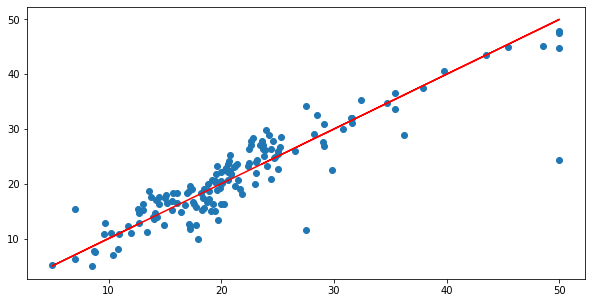

In [77]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RSME:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
 
print('Varscore:', metrics.explained_variance_score(y_test,y_pred))
 
fig=plt.figure(figsize=(10,5))
plt.scatter(y_test, y_pred)
 
plt.plot(y_test,y_test,'r')
